# Recommendation System

### Data Description:

Unique ID of each anime.


Anime title.


Anime broadcast type, such as TV, OVA, etc.


anime genre.


The number of episodes of each anime.


The average rating for each anime compared to the number of users who gave ratings.

Number of community members for each anime.

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

Objective:
The objective of this assignment is to implement a recommendation system using cosine similarity on an anime dataset.
Dataset:
Use the Anime Dataset which contains information about various anime, including their titles, genres,No.of episodes and user ratings etc.

Tasks:

Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).


Handle missing values, if any.


Explore the dataset to understand its structure and attributes.


In [ ]:
#load dataset
df=pd.read_csv('anime.csv')

In [ ]:
df.shape

(12294, 7)

In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
len(df['name'].unique()) # we have 12292 unique anime name

12292

In [ ]:
len(df['genre'].unique()) #with genre of 3265

3265

In [ ]:
df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [ ]:
len(df['rating'].unique()) #rating from 0 to 10 we have 599

599

In [ ]:
#groupy
df.groupby('type')['rating'].mean().sort_values(ascending=False)## we have TV watching people is more

,rating
type,
TV,6.902299
Special,6.523501
OVA,6.375221
Movie,6.318058
ONA,5.643298
Music,5.588996


In [ ]:
#groupby
df.groupby('genre')['rating'].mean().sort_values(ascending=False)## we have Action, Adventure, Drama, Fantasy, Magic, Military, Shounen	 watching people is more

,rating
genre,
"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",9.26
"Drama, Fantasy, Romance, Slice of Life, Supernatural",9.06
"Drama, School, Shounen",9.05
"Action, Drama, Mecha, Military, Sci-Fi, Super Power",8.98
"Adventure, Drama, Supernatural",8.93
...,...
"Horror, School, Seinen, Supernatural",NaN
"Magic, Military",NaN
"Mecha, School",NaN


In [ ]:
## fill missing values in genre and type
df['genre'] = df['genre'].fillna('Unknown')
df['type'] = df['type'].fillna('Unknown')

Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).


Convert categorical features into numerical representations if necessary.


Normalize numerical features if required.

In [ ]:
df1 = df[['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']]

In [ ]:
# Concatenate the two text columns (genre and type)
df1['combined_features'] = df1['genre'] + ' ' + df1['type']
df1['combined_features']

,combined_features
0,"Drama, Romance, School, Supernatural Movie"
1,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,"Action, Comedy, Historical, Parody, Samurai, S..."
3,"Sci-Fi, Thriller TV"
4,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...
12289,Hentai OVA
12290,Hentai OVA
12291,Hentai OVA
12292,Hentai OVA


In [ ]:
#We will recommend the anime by genre and rating wise
tfidf=TfidfVectorizer(stop_words='english') # Stop_words means is, in , ...these types of words
tfidf1=tfidf.fit_transform((df1['combined_features'])) ## Vectorization of texts
tfidf1.shape

(12294, 52)

In [ ]:
# Compute cosine similarity between all anime entries
cos_sim = cosine_similarity(tfidf1, tfidf1)
cos_sim.shape #Similarity matrix will be created by 12294 X 12294 matix

(12294, 12294)


Recommendation System:

Design a function to recommend anime based on cosine similarity.


Given a target anime, recommend a list of similar anime based on cosine similarity scores.


Experiment with different threshold values for similarity scores to adjust the recommendation list size.


In [ ]:
# RECOMMEND ANIME BASED ON TYPE + GENRE SIMILARITY
# Define the recommendation function
def recommend_anime(title, num_recommendations=5, threshold=0.2): #title = Name of anime, num_recommendations = no of recommendations that want to show, threshold can be changed
    if title not in df1['name'].values: # Check if the anime exists
        print(" Anime not found. Please check the title.") #if not print anime not found
        return
    idx = df1[df1['name'] == title].index[0] # If anime found, Get index of the animme
    sim_scores = list(enumerate(cos_sim[idx])) # Get similarity scores for all anime
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)# Sort by similarity (descending order), key =lambda is for ordering the score by value wise not index wise
    sim_scores = [x for x in sim_scores[1:] if x[1] >= threshold] # Skip itself and apply threshold
    sim_scores = sim_scores[:num_recommendations] # Select top-N recommendations
    print(f"\n Top {len(sim_scores)} Anime similar to '{title}' based on Type + Genre:\n") # Print results with type and genre info
    for i, (index, score) in enumerate(sim_scores): #enumerate(sim_scores), we get a new sequence of tuples (i, (index, score)), where i gives ist of recommendations
        print(f"{i+1}. {df1.iloc[index]['name']}") ## df1.iloc[index] gets the entire row at the given integer index,
        print(f"Type: {df1.iloc[index]['type']}") #  and then ['name'], ['type'], or ['genre'] accesses the specific column value for that row.
        print(f"Genre: {df1.iloc[index]['genre']}")
        print(f"Similarity Score: {score:.3f}\n")


In [ ]:
recommend_anime("Naruto") # getting list of recommendations and its type , genre, and similarity socre


 Top 5 Anime similar to 'Naruto' based on Type + Genre:

1. Naruto
Type: TV
Genre: Action, Comedy, Martial Arts, Shounen, Super Power
Similarity Score: 1.000

2. Naruto x UT
Type: OVA
Genre: Action, Comedy, Martial Arts, Shounen, Super Power
Similarity Score: 0.953

3. Rekka no Honoo
Type: TV
Genre: Action, Adventure, Martial Arts, Shounen, Super Power
Similarity Score: 0.949

4. Boruto: Naruto the Movie
Type: Movie
Genre: Action, Comedy, Martial Arts, Shounen, Super Power
Similarity Score: 0.945

5. Naruto: Shippuuden Movie 4 - The Lost Tower
Type: Movie
Genre: Action, Comedy, Martial Arts, Shounen, Super Power
Similarity Score: 0.945



In [ ]:
# Split dataset to simulate evaluation
train, test = train_test_split(df1, train_size=0.8, random_state=42)

Evaluation:

Split the dataset into training and testing sets.


Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.


Analyze the performance of the recommendation system and identify areas of improvement.


In [22]:
##average of ratings by anime wise
df1.groupby('name')['rating'].mean().sort_values(ascending=False)

,rating
name,
Taka no Tsume 8: Yoshida-kun no X-Files,10.00
Spoon-hime no Swing Kitchen,9.60
Mogura no Motoro,9.50
Kimi no Na wa.,9.37
Kahei no Umi,9.33
...,...
Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,NaN
Yuyushiki Special,NaN
Zero kara Hajimeru Mahou no Sho,NaN


In [ ]:
''' The evaluation function evaluate_recommender uses the similarity scores to find the top top_n most similar anime for a given anime from the test set.
 However, it doesn't directly use the similarity score of the target anime itself for evaluation.
 calculates the average rating of those top top_n similar anime.
 This average rating is then used to predict whether the target anime is "good" (if the average rating of its similar anime is 7 or above) or "not good".
 This prediction is then compared to the actual rating of the target anime from the test set to calculate the precision, recall, and F1-score.'''

In [20]:
# EVALUATION FUNCTION (Precision, Recall, F1)
def evaluate_recommender(threshold=0.2, top_n=5):
    print("Evaluating recommender system...")
    preds, truths = [], [] #open a list for prediction and truth
    for title in test['name'].sample(1000, random_state=10): ## # Take a random sample of anime for testing
        idx = test[test['name'] == title].index[0] #this line finds the index of the current anime title in the test DataFrame.
        true_rating = test.loc[idx, 'rating'] #Now, get the actual rating of the current anime from the test
        truths.append(1 if true_rating >= 7 else 0) # Actual class: 1 if this anime is considered "good"
        sim_scores = list(enumerate(cos_sim[idx])) # Get top-N most similar anime indices
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
        top_avg_rating = df1.iloc[[i[0] for i in sim_scores]]['rating'].mean()
        preds.append(1 if top_avg_rating >= 7 else 0) ## # Predict: good if top similar anime also have good ratings
    precision = precision_score(truths, preds) # Compute metrics
    recall = recall_score(truths, preds)
    f1 = f1_score(truths, preds)
    print("\n PERFORMANCE METRICS:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

In [21]:
# Run evaluation
evaluate_recommender(threshold=0.2, top_n=5)

Evaluating recommender system...

 PERFORMANCE METRICS:
Precision: 0.49
Recall: 0.62
F1 Score: 0.55


In [ ]:
import matplotlib.pyplot as plt

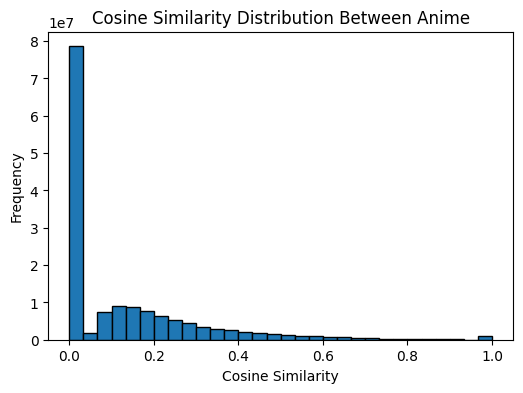

In [ ]:
# COSINE SIMILARITY DISTRIBUTION (Quality Insight)
# -------------------------------------------------------------
# Check overall similarity distribution — helps understand distinctiveness
sim_values = cos_sim.flatten()
plt.figure(figsize=(6,4))
plt.hist(sim_values, bins=30, edgecolor='black')
plt.title("Cosine Similarity Distribution Between Anime")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
''' Analyze current performance and improvements:
Explore alternative features: Consider incorporating other features besides genre and type, such as member count, rating, or even external data if available.
Implement different similarity metrics: Experiment with other similarity measures besides cosine similarity, such as Euclidean distance or Pearson correlation.
Tune hyperparameters: Experiment with different values for the threshold and top_n parameters in the recommend_anime and evaluate_recommender functions to see how they impact performance.
Perform more comprehensive evaluation: Evaluate the system on a larger sample of the test set and consider additional evaluation metrics if relevant.
Iterate and evaluate: Based on the evaluation results, iterate on the improvements and re-evaluate the system until satisfactory performance is achieved.'''


Interview Questions:


1. Can you explain the difference between user-based and item-based collaborative filtering?


2. What is collaborative filtering, and how does it work?

In [23]:
''' 1: User-based Collaborative Filtering:
             It recommends items to a target user based on the preferences of other users who have similar tastes.
              "Similar users" are identified by comparing their past ratings or interactions with common items.
    2: Item-based collaborative filtering:
               It recommends items to a target user based on the similarity between items.
               If a user likes a particular item, the system recommends other items that are similar to it.'''

' 1: User-based Collaborative Filtering:\n             It recommends items to a target user based on the preferences of other users who have similar tastes. \n              "Similar users" are identified by comparing their past ratings or interactions with common items.\n    2: Item-based collaborative filtering:\n               It recommends items to a target user based on the similarity between items. \n               If a user likes a particular item, the system recommends other items that are similar to it.'

In [24]:
'''It is a technique used by recommender systems to suggest items to users by identifying similarities between users' preferences and behaviors.
 It works by,
 Data Collection: The system collects data on user preferences, such as ratings, purchases, or viewed items, to build a user-item matrix.
Similarity Calculation: It then calculates the similarity between users or items.
User-based CF: Finds users with similar rating patterns to the active user and recommends items they liked.
Item-based CF: Finds items similar to those the active user has liked and recommends those new, similar items.
Based on these calculated similarities, the system predicts and recommends items the user is likely to enjoy'''

"It is a technique used by recommender systems to suggest items to users by identifying similarities between users' preferences and behaviors.\n It works by,\n Data Collection: The system collects data on user preferences, such as ratings, purchases, or viewed items, to build a user-item matrix. \nSimilarity Calculation: It then calculates the similarity between users or items. \nUser-based CF: Finds users with similar rating patterns to the active user and recommends items they liked. \nItem-based CF: Finds items similar to those the active user has liked and recommends those new, similar items. \nBased on these calculated similarities, the system predicts and recommends items the user is likely to enjoy"